In [58]:
from Networks import *

In [59]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [60]:
def modularity(G, communities):
    m = nx.community.modularity(G, communities)
    return m

In [61]:
from scipy.stats import spearmanr

def community_rank(community):
    unique_communities = sorted(set(community.values()))
    community_rank = {c: i for i, c in enumerate(unique_communities)}
    return community_rank

def spearman_rho(community1, community2):
    rank1 = community_rank(community1)
    rank2 = community_rank(community2)
    rho, _ = spearmanr([rank1[c] for c in community1.values()], [rank2[c] for c in community2.values()])
    return rho

In [62]:
def get_communities(community_dict):
    communities = defaultdict(list)
    for node, comm_id in community_dict.items():
        communities[comm_id].append(node)
    return list(communities.values())

In [85]:
def plot_metrics_sparse_louvain(G, ground_truth, sparseFunctions, k_values, AlgoFunction, flag, networkName = None, AlgoName = None):
    ari_values = [[0] * len(k_values) for _ in sparseFunctions]
    modularity_values = [[0] * len(k_values) for _ in sparseFunctions]
    spearman_rho_values = [[0] * len(k_values) for _ in sparseFunctions]
    names = [name for name, _ in sparseFunctions]
    SparseGraphs = [[0] * len(k_values) for _ in sparseFunctions]
    
    for idx, (_, function) in enumerate(sparseFunctions):
        for i, k in enumerate(k_values):
            H = function(G, k)
            predicted = AlgoFunction(H)
            if (flag == 1):
                predicted = get_community_dict(predicted)
            ari, _ = metrics(ground_truth, predicted)
            modularity_values[idx][i] = modularity(H, get_communities(predicted))
            spearman_rho_values[idx][i] = spearman_rho(ground_truth, predicted)
            ari_values[idx][i] = ari
            SparseGraphs[idx][i] = H
    
    plt.figure(figsize = (12, 8))
    plt.xticks(range(len(k_values)), [f"{100 * k}%" for k in k_values])
    for idx in range(len(sparseFunctions)):
        plt.plot(ari_values[idx], label = names[idx], marker = "o")
        for i, txt in enumerate(ari_values[idx]):
            plt.annotate(f"{txt:.4f}", (i, ari_values[idx][i]))      
    plt.xlabel("Percentage Retention of Edges")
    plt.ylabel("ARI")
    plt.title(f"ARI for {AlgoName} vs k for {networkName}")
    plt.legend()
    plt.grid()
    plt.show()
    
    plt.figure(figsize = (12, 8))
    plt.xticks(range(len(k_values)), [f"{100 * k}%" for k in k_values])
    for idx in range(len(sparseFunctions)): 
        plt.plot(modularity_values[idx], label = names[idx], marker = "o")
        for i, txt in enumerate(modularity_values[idx]):
            plt.annotate(f"{txt:.4f}", (i, modularity_values[idx][i]))

    plt.axhline(y = modularity(G, get_communities(ground_truth)), color = "black", linestyle = "--", label = "Original Graph")
    plt.xlabel("Percentage Retention of Edges")
    plt.ylabel("Modularity")
    plt.title(f"Modularity for {AlgoName} vs k for {networkName}")
    plt.legend()
    plt.grid()
    plt.show()
    
    plt.figure(figsize = (12, 8))
    plt.xticks(range(len(k_values)), [f"{100 * k}%" for k in k_values])
    for idx in range(len(sparseFunctions)):
        plt.plot(spearman_rho_values[idx], label = names[idx], marker = "o")
        for i, txt in enumerate(spearman_rho_values[idx]):
            plt.annotate(f"{txt:.4f}", (i, spearman_rho_values[idx][i]))
    plt.xlabel("Percentage Retention of Edges")
    plt.ylabel("Spearman Rho")
    plt.title(f"Spearman Rho for {AlgoName} vs k for {networkName}")
    plt.legend()
    plt.grid()
    plt.show()
    
    return SparseGraphs

In [81]:
def run_lpa(G):
    communities = nx.community.label_propagation.label_propagation_communities(G)
    return communities

In [82]:
k_values = [0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01]
sparseFunctions = [("Edge Betweenness", edge_betweenness_sparsification), ("Random", edge_random_sparsification), ("Edge Jaccard JC", edge_jaccard_sparsification), (r"$^*$Edge Local Search L-Spar", edge_L_Spar_sparsification)]

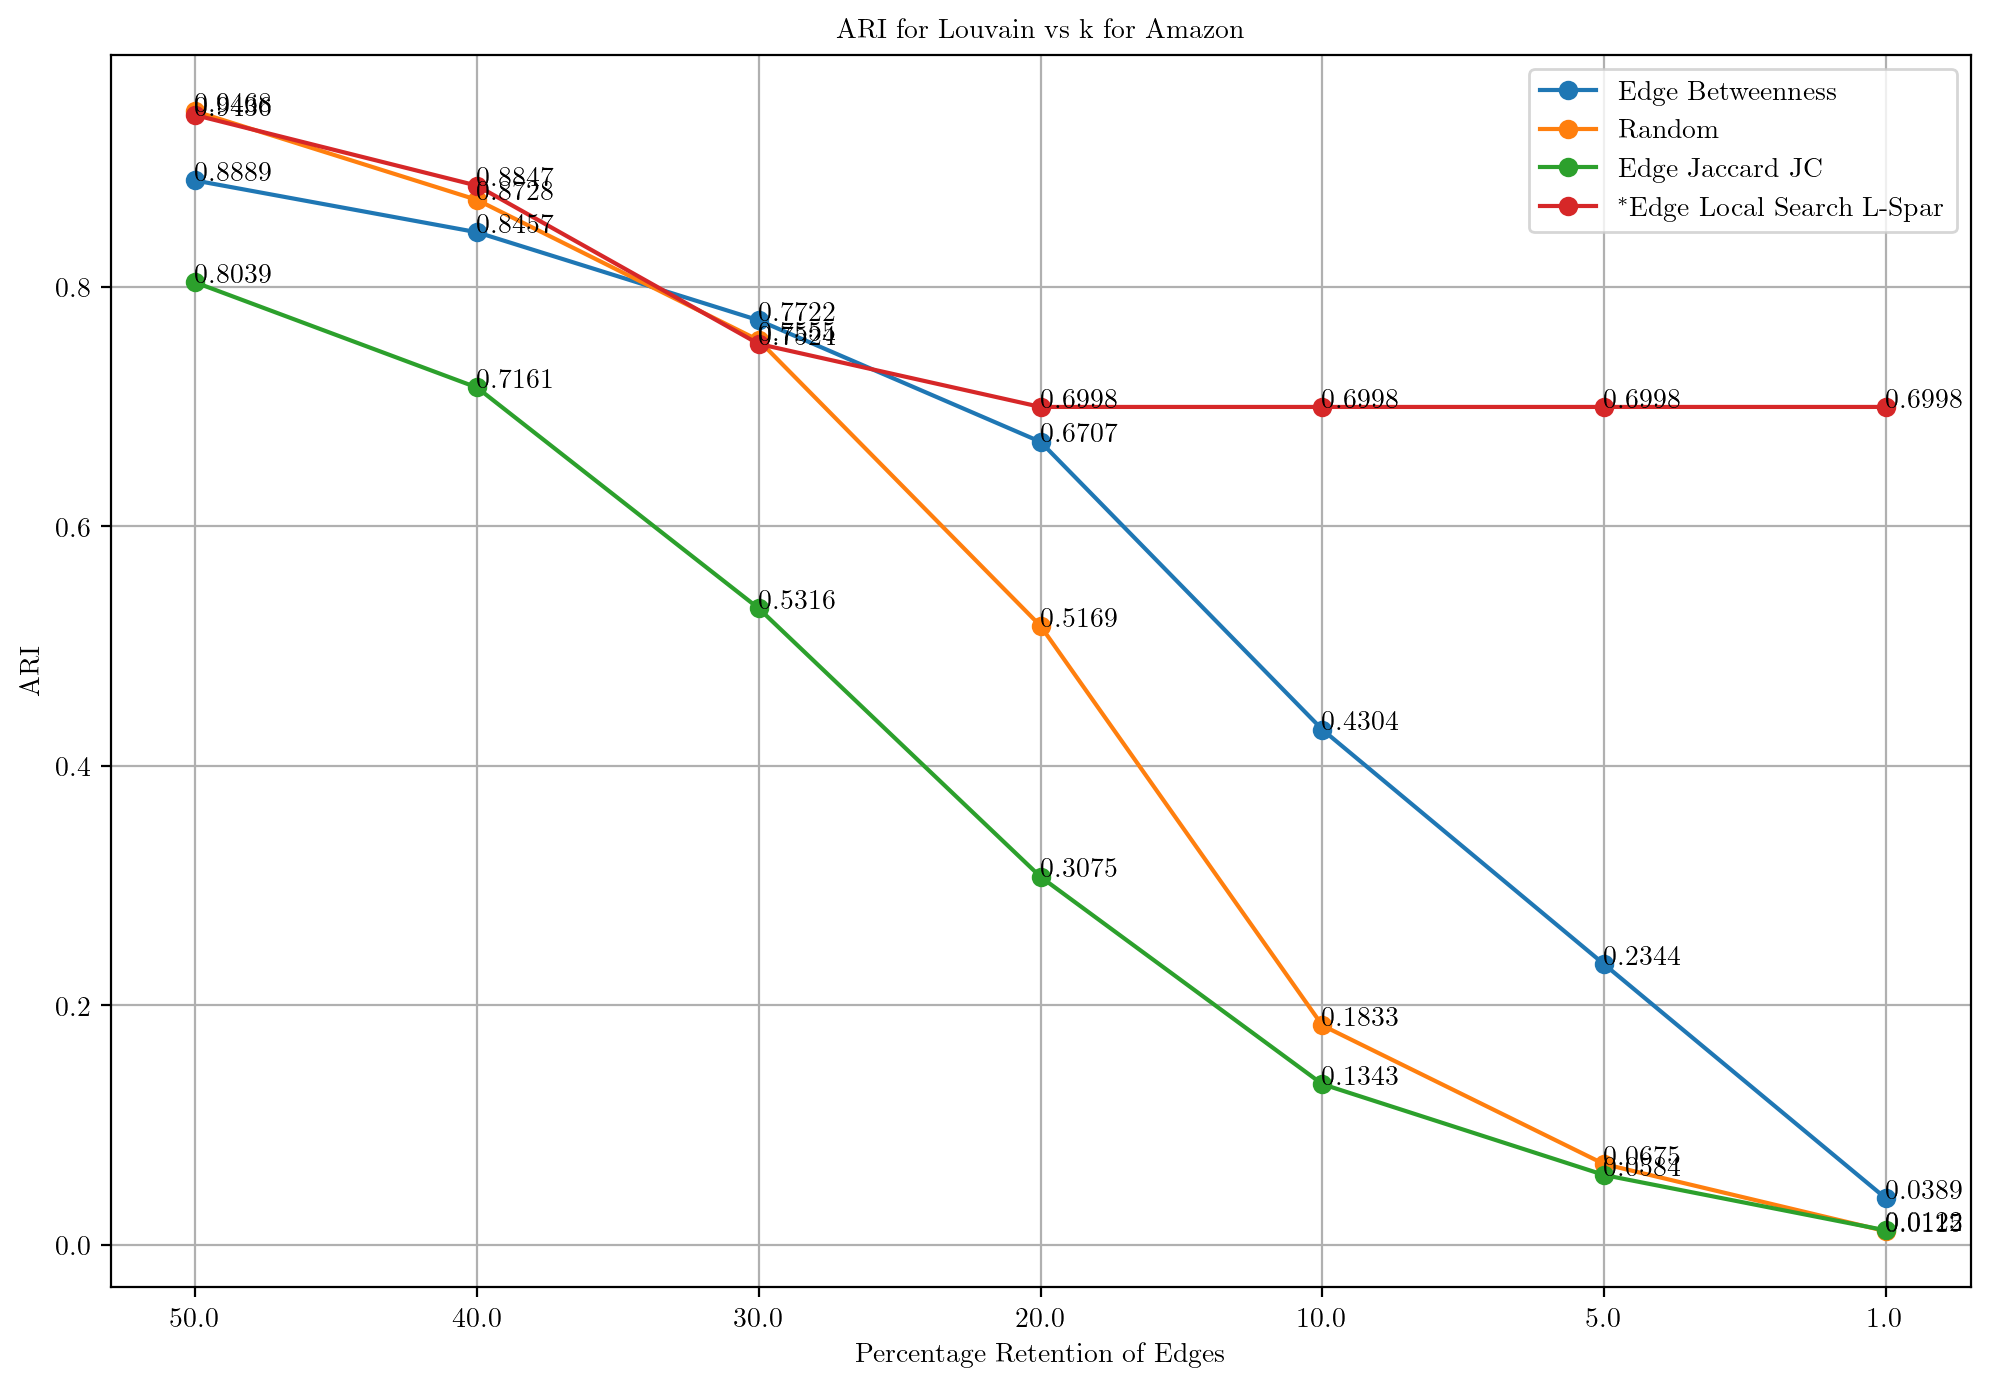

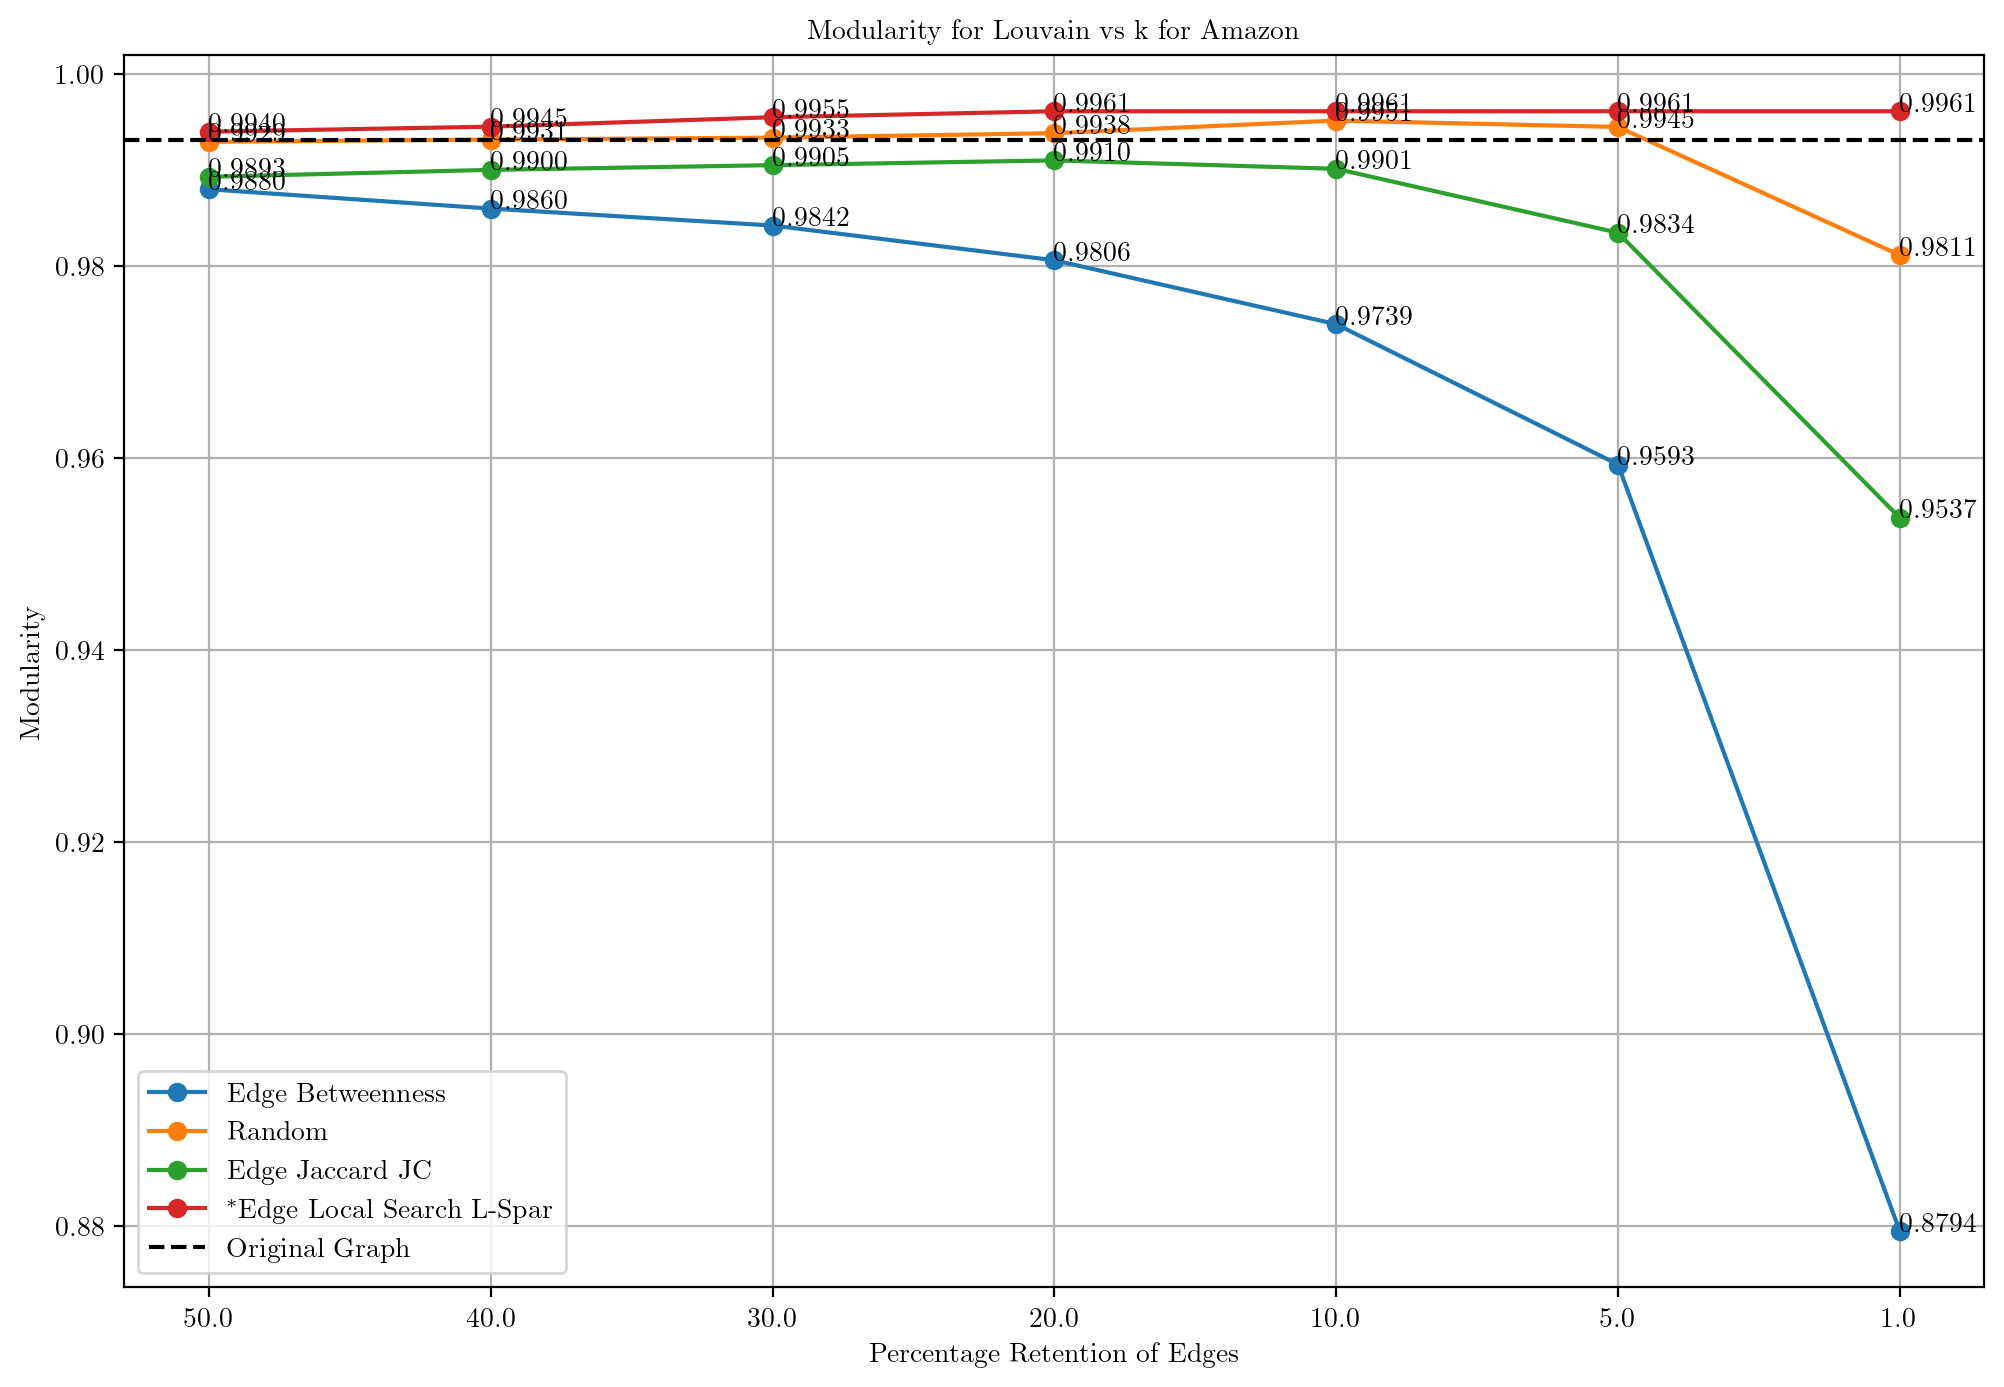

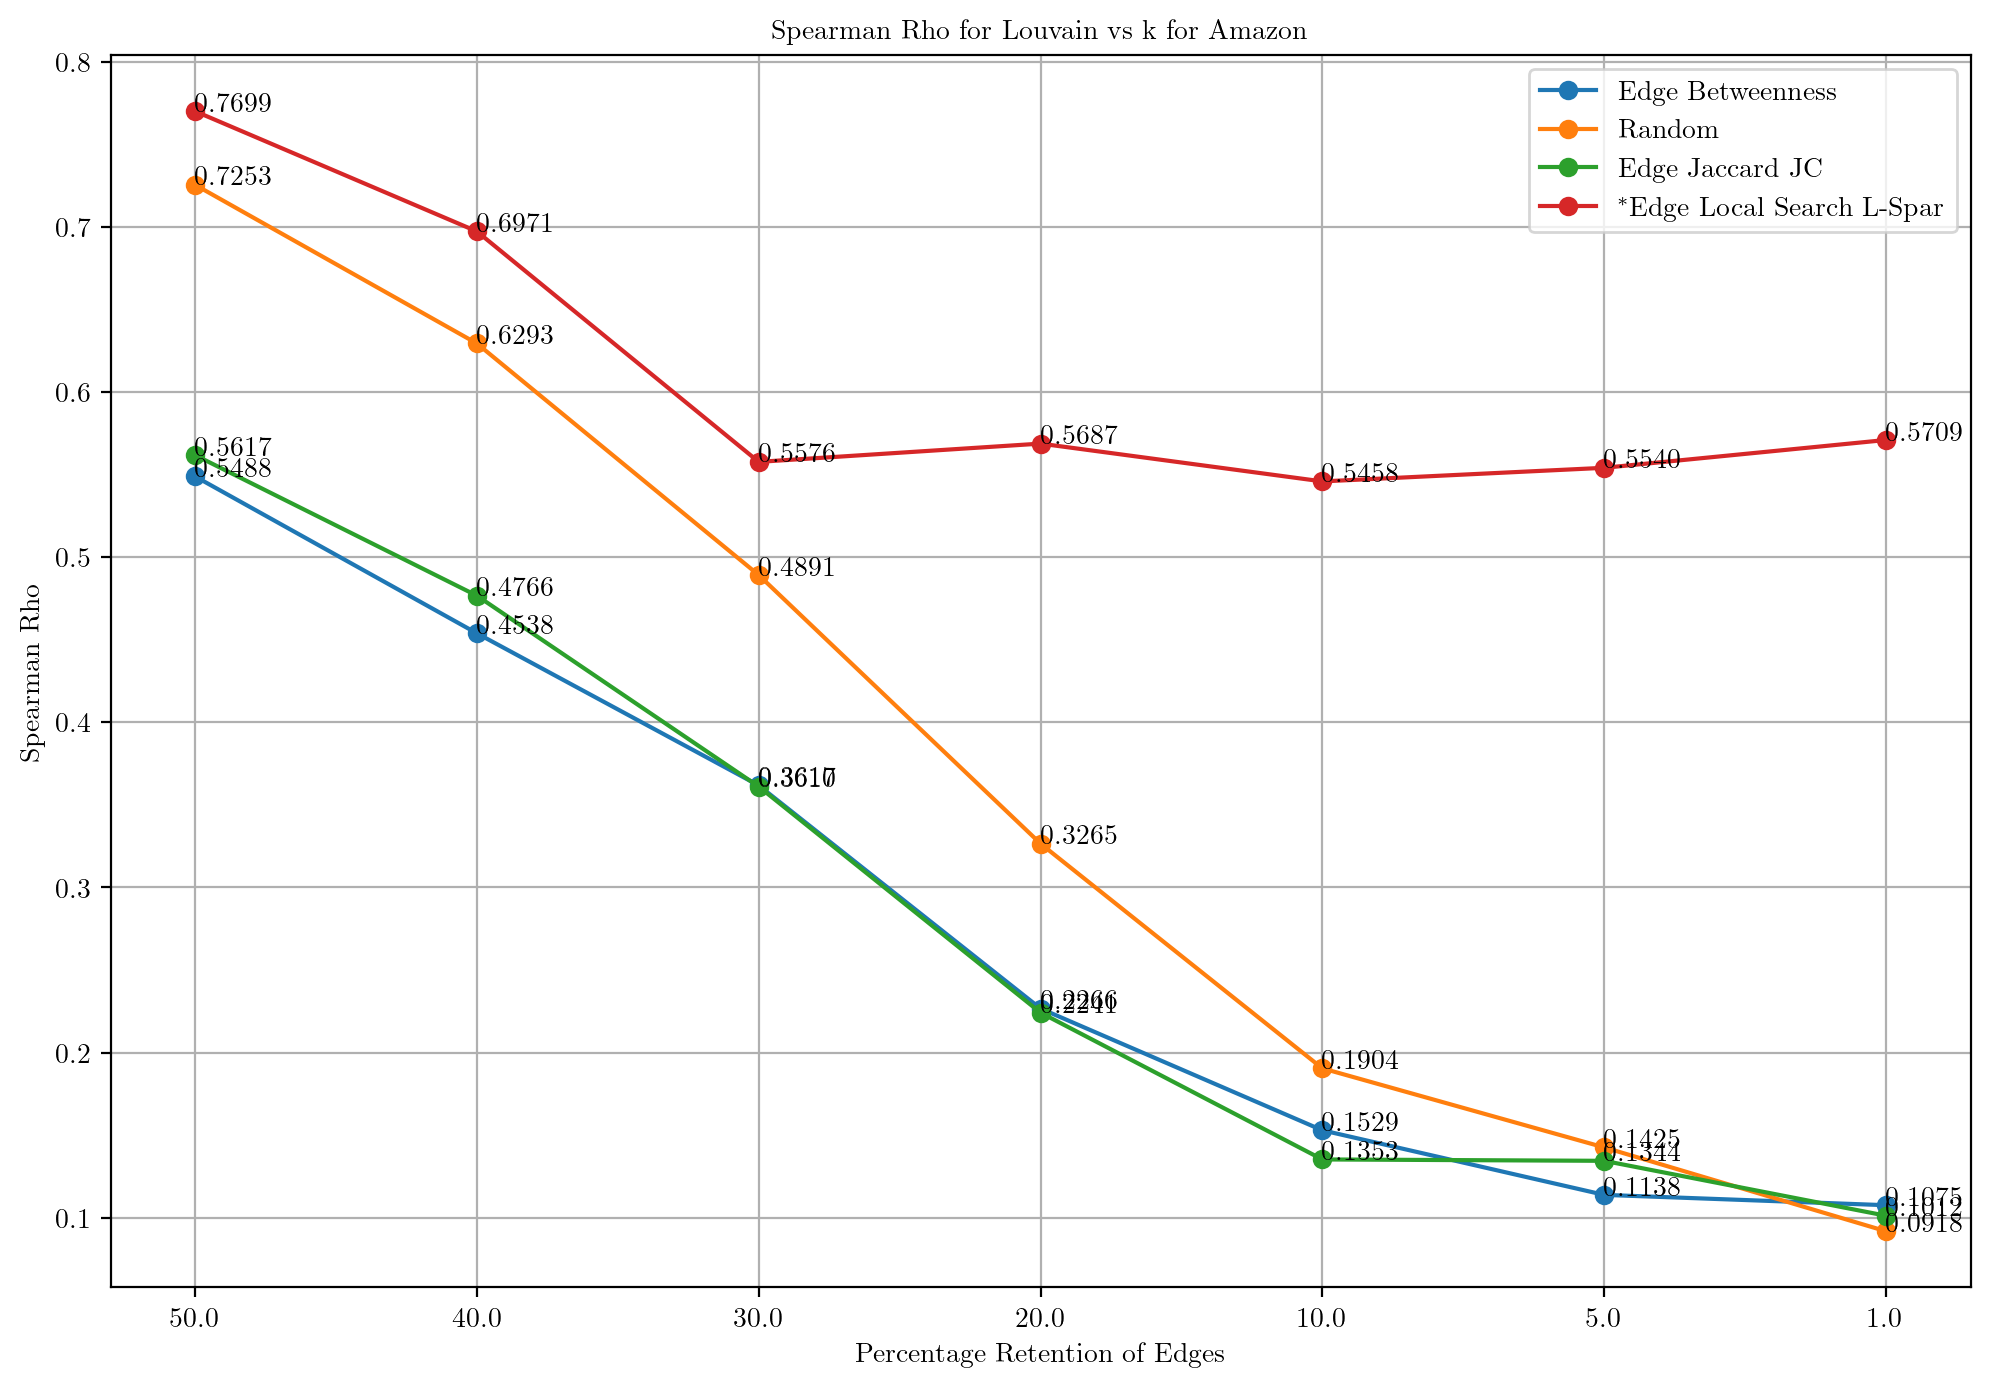

In [83]:
sparseAmzLouvGraphs = plot_metrics_sparse_louvain(G_ind_Amz, run_louvain(G_ind_Amz), sparseFunctions, k_values, run_louvain, 0, "Amazon")

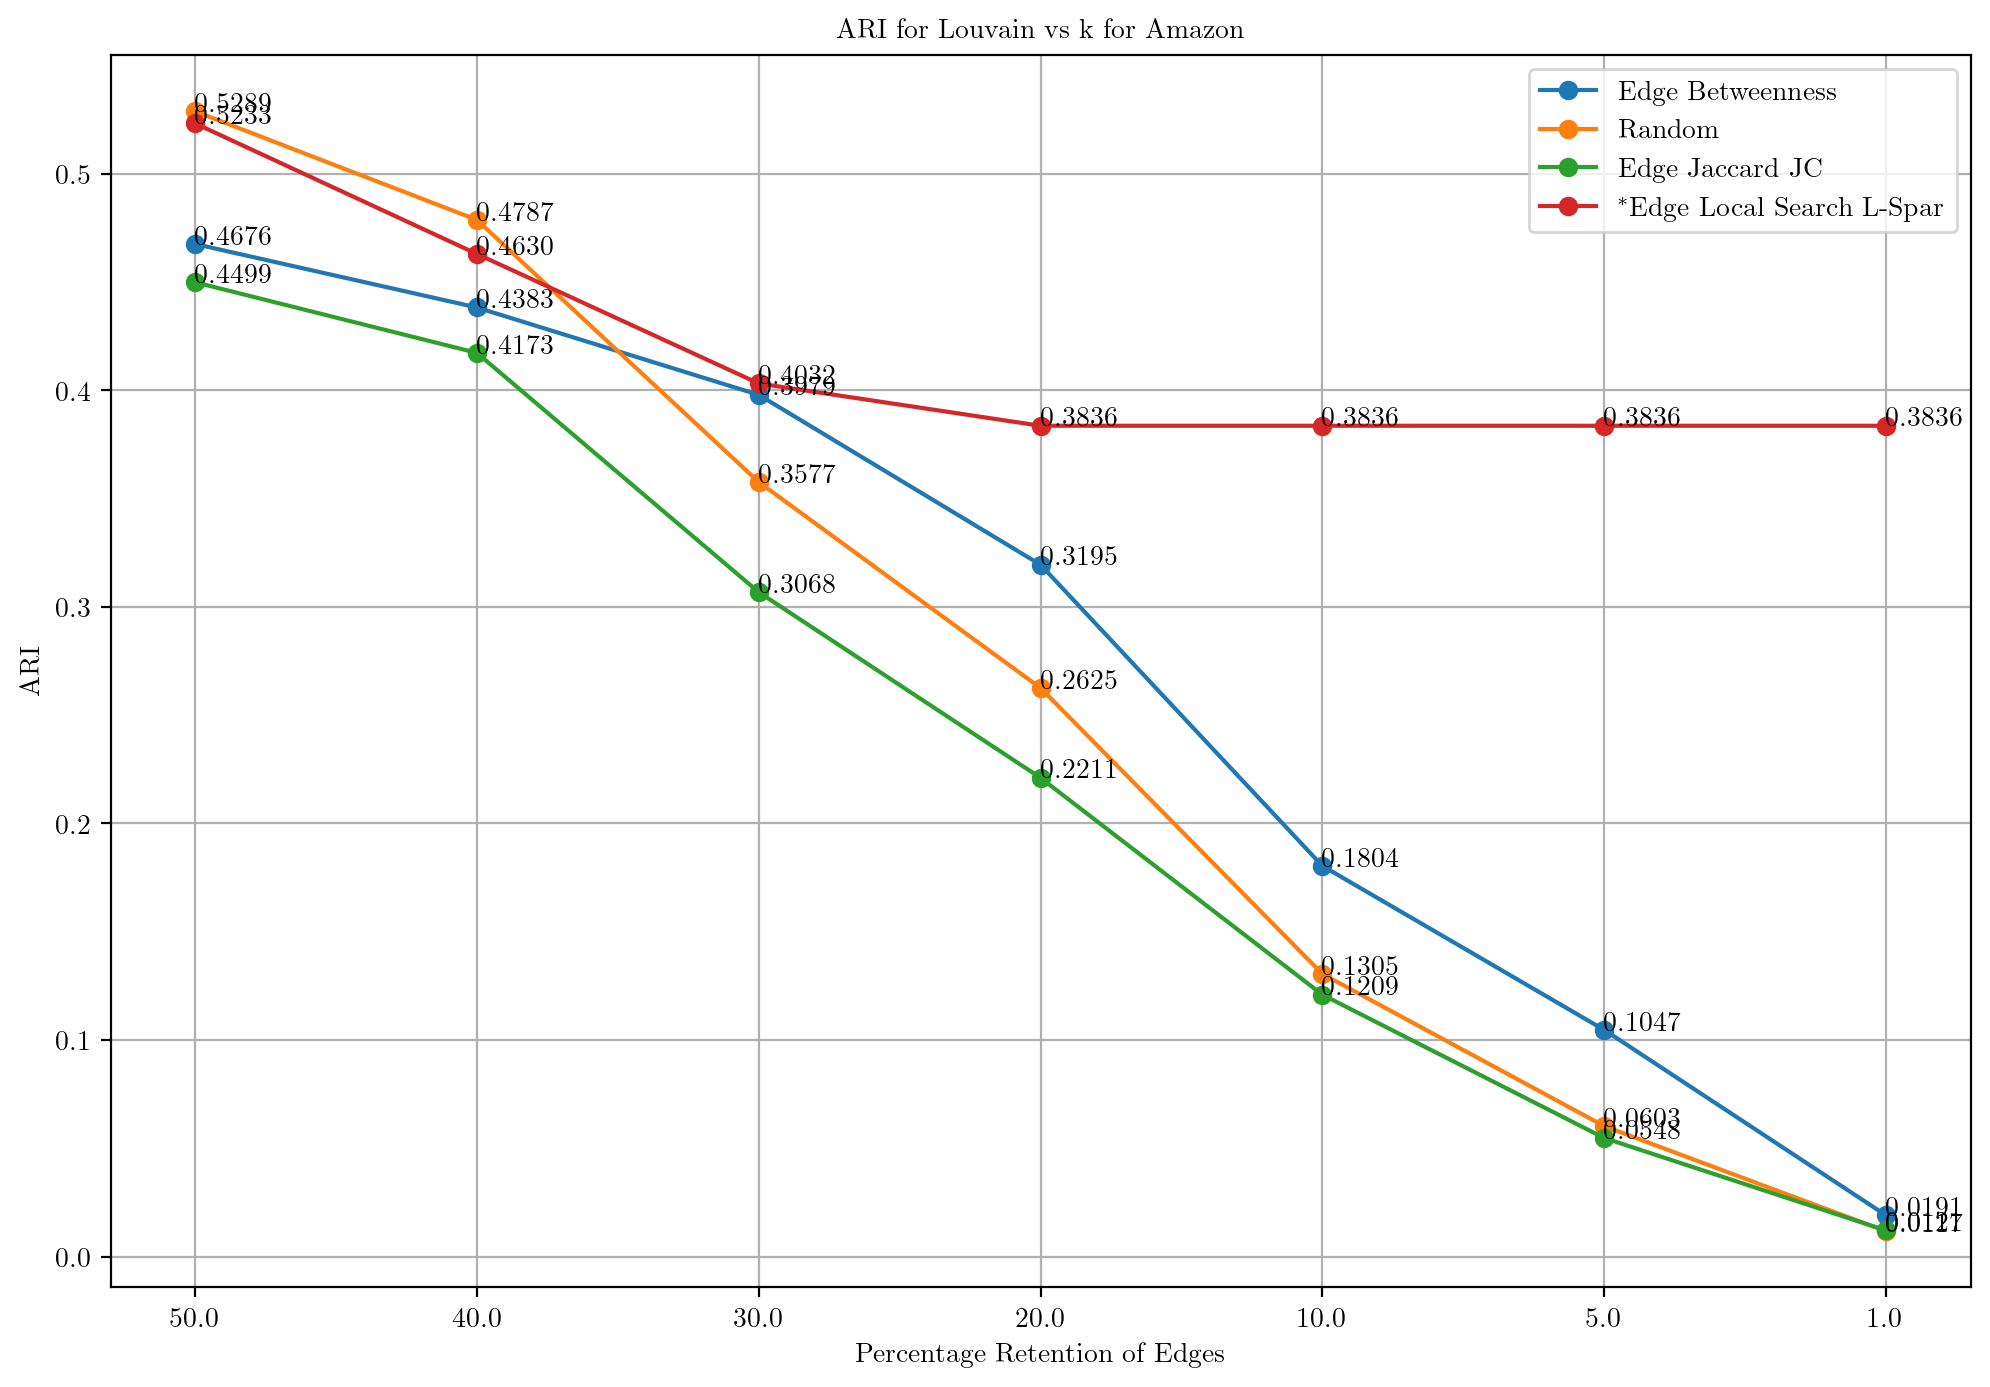

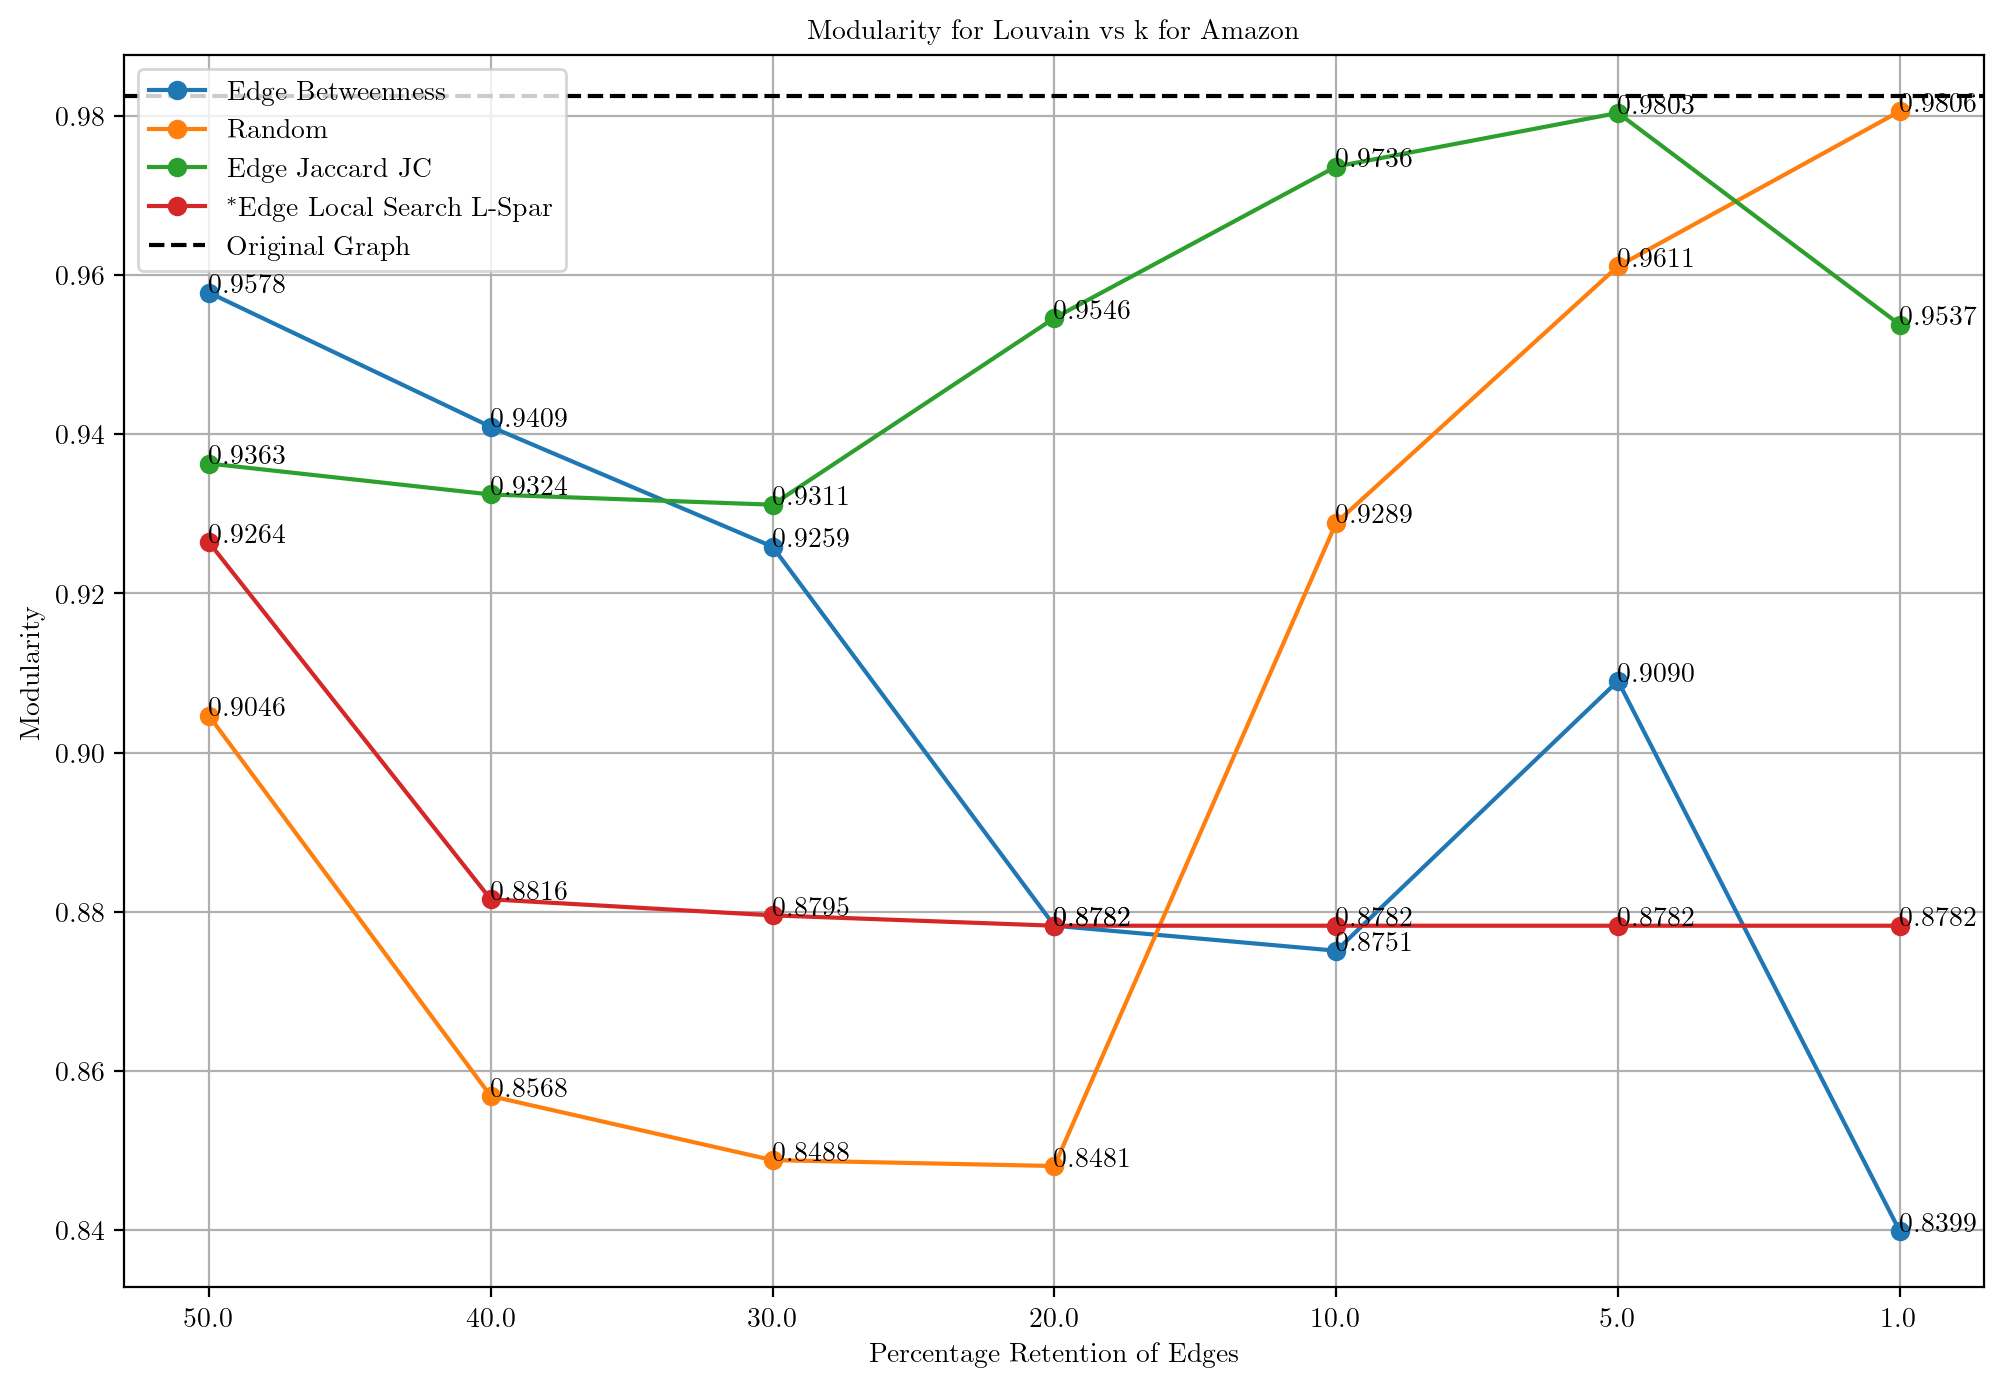

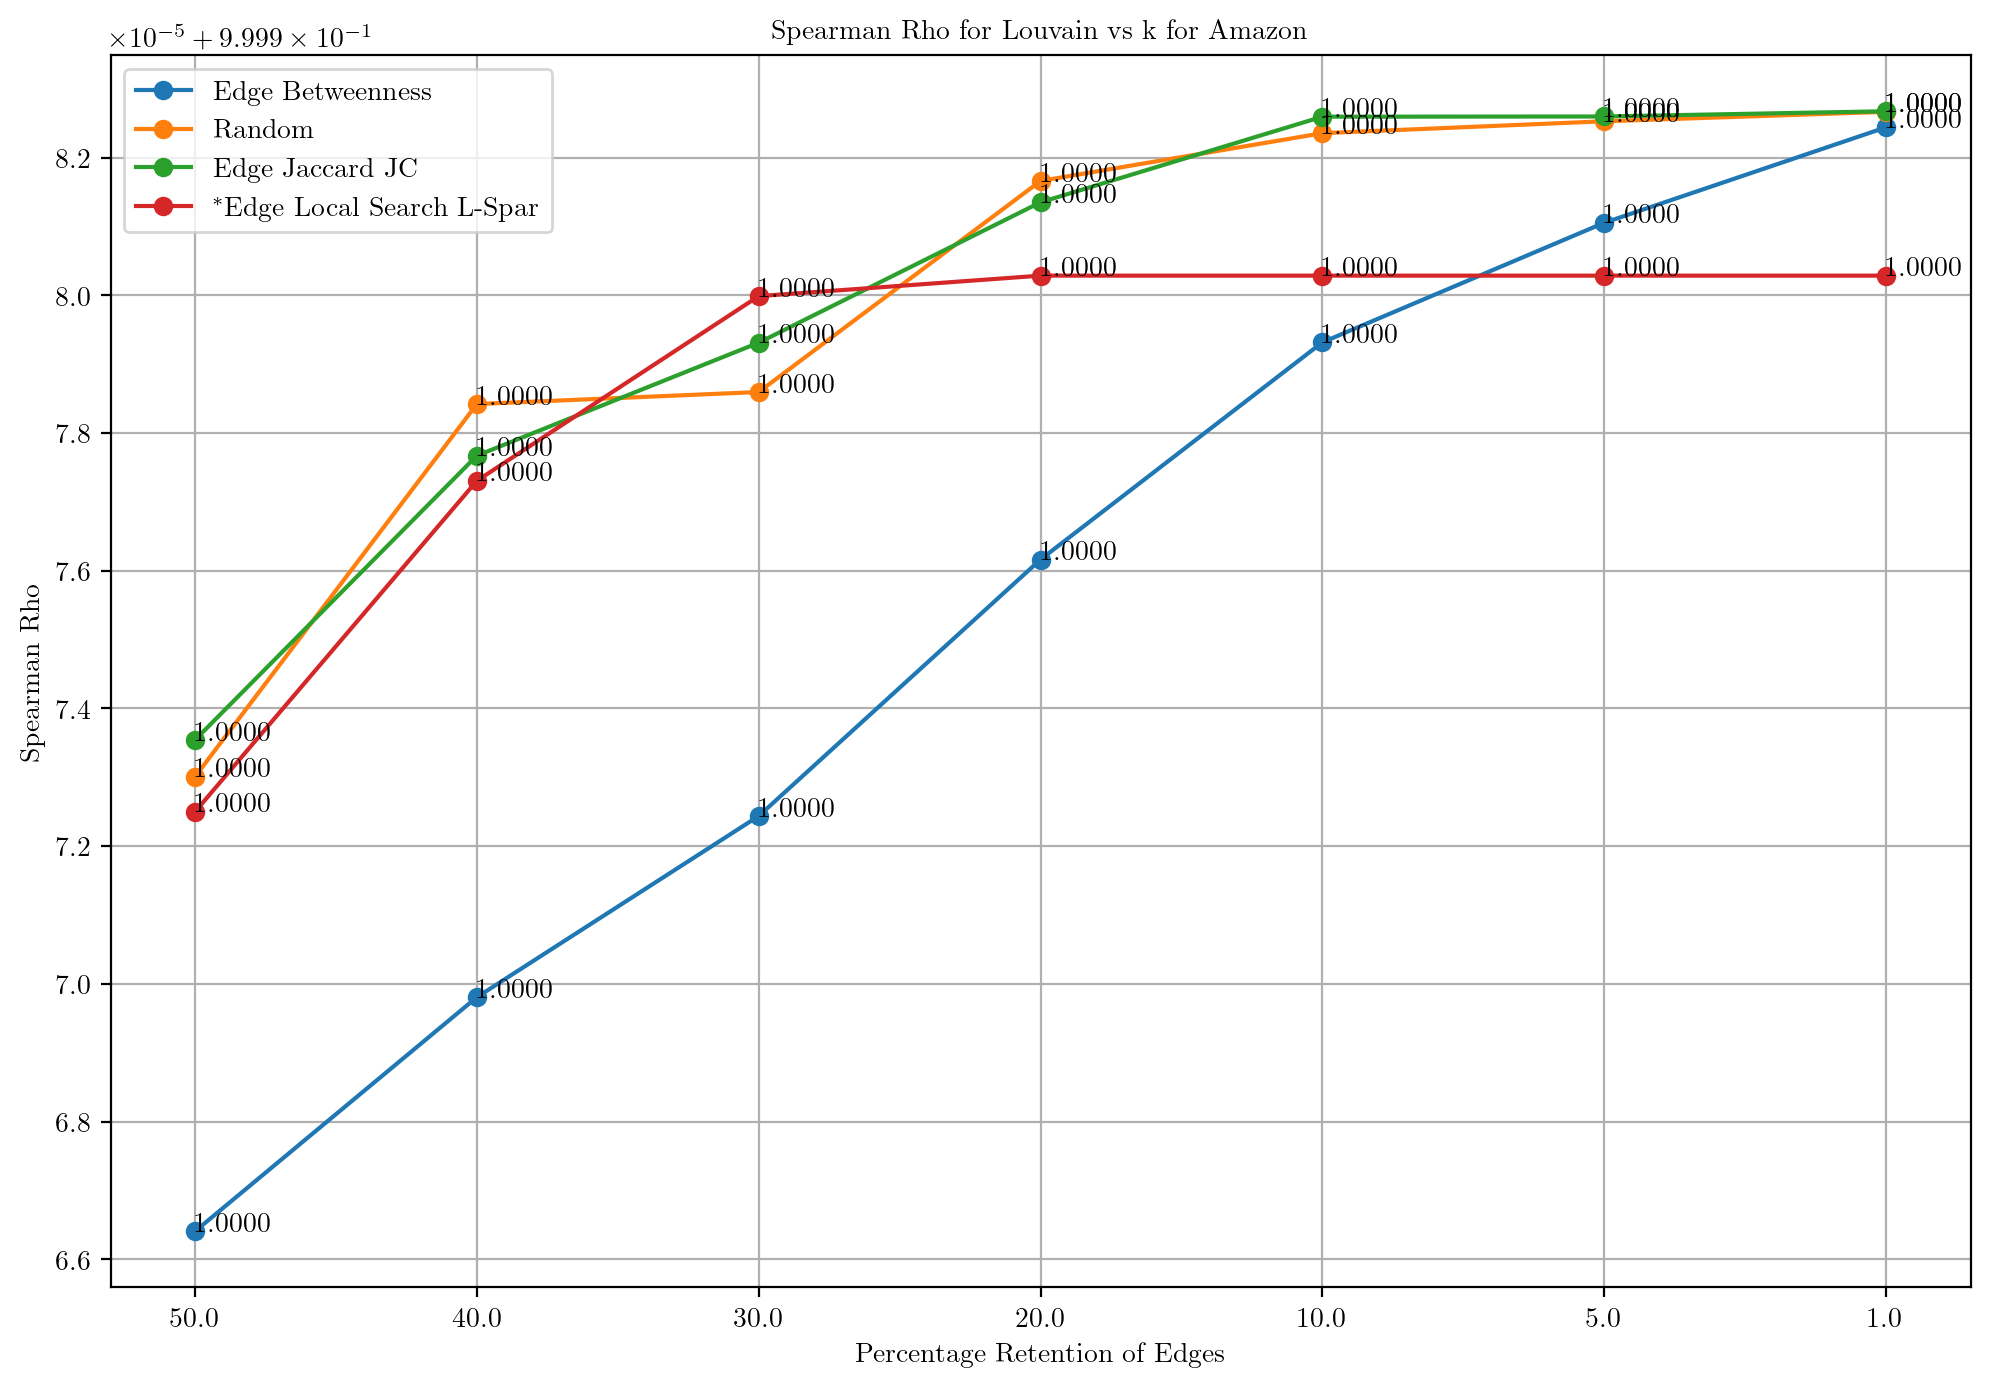

In [84]:
sparseAmzLPAGraphs = plot_metrics_sparse_louvain(G_ind_Amz, get_community_dict(run_lpa(G_ind_Amz)), sparseFunctions, k_values, run_lpa, 1, "Amazon")